Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Unzip train data

In [3]:
!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

Load data

In [4]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
!pwd

/content


In [6]:
image_path ='Images/train/'

In [8]:
x = np.array([
    img_to_array(
        load_img(
            image_path + df['filename'][i],   # filename from CSV
            color_mode='grayscale',           # grayscale = 1 channel
            target_size=(28, 28)              # resize to 28x28
        )
    )
    for i in tqdm(range(df.shape[0]))
], dtype='float32')


  0%|          | 0/49000 [00:00<?, ?it/s]

In [9]:
y = df['label']

In [10]:
print(x.shape,y.shape)

(49000, 28, 28, 1) (49000,)


Data Analysis

4


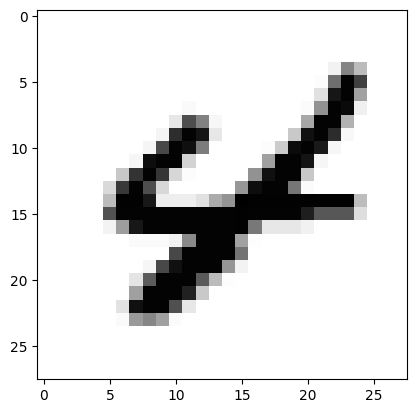

In [11]:
image_index = 0
print(y[image_index])
plt.imshow(x[image_index].reshape(28,28), cmap='Greys')

1


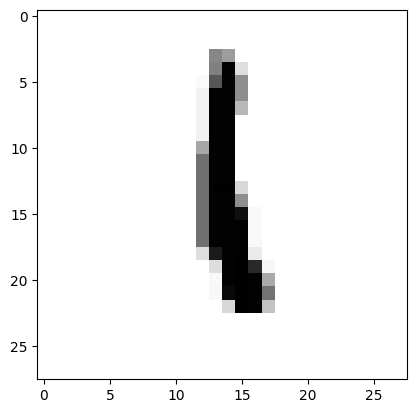

In [12]:
image_index = 85
print(y[image_index])
plt.imshow(x[image_index].reshape(28,28), cmap='Greys')

Train-test split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=np.array(y))

Normalization

In [14]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [15]:
x_train /= 255
x_test /= 255

In [16]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Model Creation

In [20]:
input_shape = (28,28,1)
output_class = 10

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
#train the model
model.fit(x=x_train,y=y_train, batch_size=32, epochs=30 , validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.8666 - loss: 0.4392 - val_accuracy: 0.9647 - val_loss: 0.1141
Epoch 2/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.9642 - loss: 0.1144 - val_accuracy: 0.9687 - val_loss: 0.0977
Epoch 3/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.9732 - loss: 0.0844 - val_accuracy: 0.9769 - val_loss: 0.0753
Epoch 4/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.9805 - loss: 0.0608 - val_accuracy: 0.9789 - val_loss: 0.0687
Epoch 5/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9841 - loss: 0.0477 - val_accuracy: 0.9809 - val_loss: 0.0664
Epoch 6/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9869 - loss: 0.0403 - val_accuracy: 0.9811 - val_loss: 0.0651
Epoch 7/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.9879 - loss: 0.0361 - val_accuracy: 0.9807 - val_loss: 0.0703
Epoch 8/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9898 -

testing the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted output :  6


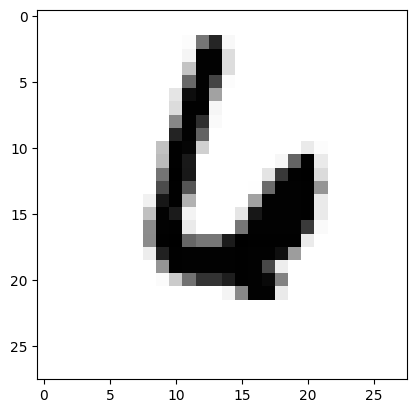

In [23]:
image_index = 7
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output : ",pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted output :  5


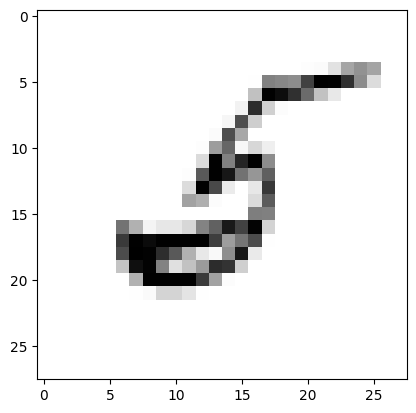

In [24]:
image_index = 78
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output : ",pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted output :  7


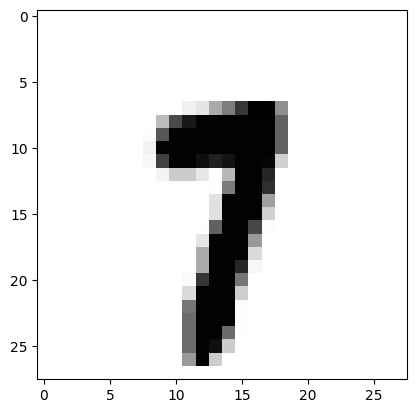

In [25]:
image_index = 4
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output : ",pred.argmax())